In [1]:
import torch
import math

In [2]:
idx2word, fwm_targets, fwm_losses = torch.load("logs_ptb/losses_FWMRNNv2.pt")

In [3]:
_, lstm_targets, lstm_losses = torch.load("logs_ptb/losses_LSTM.pt")

In [4]:
len(idx2word)

10000

In [5]:
fwm_targets.shape

torch.Size([82429])

In [6]:
fwm_bits = fwm_losses.cpu() / math.log(2) # bits
print(fwm_bits.shape)
print("bits: ", fwm_bits.mean().item())
print("ppl: ", math.exp(fwm_losses.cpu().mean().item()))

torch.Size([82429])
bits:  5.784934997558594
ppl:  55.136444628669935


In [7]:
lstm_targets.shape

torch.Size([82429])

In [8]:
lstm_bits = lstm_losses.cpu() / math.log(2) # bits
print(lstm_bits.shape)
print("bits: ", lstm_bits.mean().item())
print("ppl: ", math.exp(lstm_losses.cpu().mean().item()))

torch.Size([82429])
bits:  5.885777950286865
ppl:  59.12826415829831


In [9]:
(fwm_targets == lstm_targets).all()

tensor(1, device='cuda:0', dtype=torch.uint8)

In [10]:
targets = lstm_targets.cpu()
def translate(tensor):
    return " ".join([idx2word[idx.item()] for idx in tensor])

In [11]:
translate(targets[:50])

"it was n't black monday <eos> but while the new york stock exchange did n't fall apart friday as the dow jones industrial average plunged N points most of it in the final hour it barely managed to stay this side of chaos <eos> some circuit breakers installed after the"

In [12]:
diff = fwm_bits - lstm_bits

negative diff means fwm is better

In [13]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

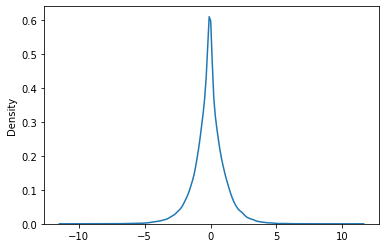

In [14]:
sns.kdeplot(diff.numpy())

In [15]:
import matplotlib.pylab as plt
def text_segment(idx, before=50, after=5):
    if isinstance(idx, torch.Tensor):
        idx = idx.item()
    print("position: ", idx)
    print("word: ", translate(targets[[idx]]))
    print("fwm bits: {:.4f}".format(fwm_bits[idx].item()))
    print("lstm bits: {:.4f}".format(lstm_bits[idx].item()))
    print()
    words = [idx2word[w.item()] 
             for  w in targets[(idx-before):idx+after]]
    fwm = fwm_bits[(idx-before):idx+after]
    lstm = lstm_bits[(idx-before):idx+after]
    diff = fwm - lstm
    
    data = torch.stack([lstm, fwm], dim=0)
    
    f, axes = plt.subplots(2, 1, figsize=(20,2), sharex=True)
    sns.despine(left=True)
    
    # model preds
    yticklabels = ["lstm", "fwm"]
    ax = axes[0]
    sns.heatmap(data, cmap='OrRd', ax=ax, vmax=15.0, vmin=0.0)
    ax.set_yticklabels(yticklabels, rotation=0.)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    # diff
    ax = axes[1]
    sns.heatmap(torch.stack([diff], dim=0), xticklabels=words, cmap='PiYG', ax=ax, vmin=-6., vmax=6.)
    ax.set_yticklabels(["diff"], rotation=0)
    ax.set_xticklabels(words)
    plt.show()

Plots the bit loss for different sections of the PTB test set where the difference between the FWM and the LSTM is large.

cases:  521
position:  75
word:  firms
fwm bits: 3.5226
lstm bits: 8.2186



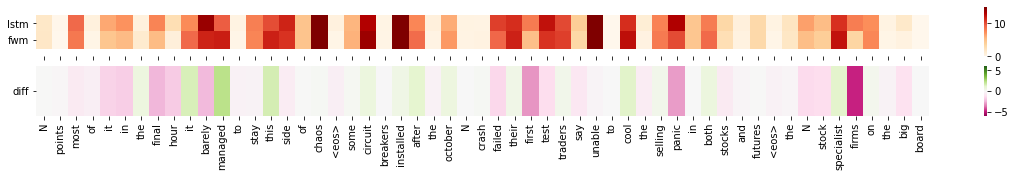

position:  578
word:  financing
fwm bits: 2.9705
lstm bits: 8.5084



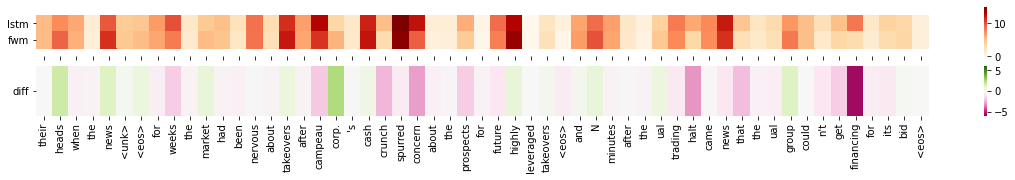

position:  609
word:  of
fwm bits: 0.4204
lstm bits: 5.6559



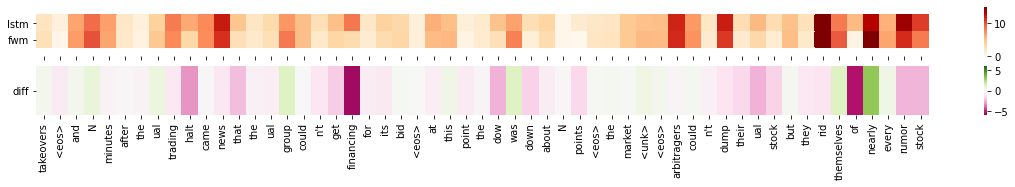

position:  954
word:  buy
fwm bits: 0.4984
lstm bits: 4.8694



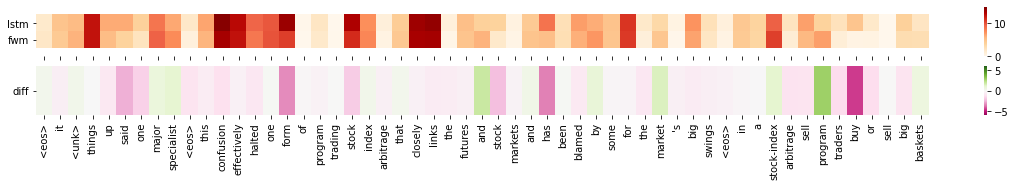

position:  1830
word:  yes
fwm bits: 2.9635
lstm bits: 7.4893



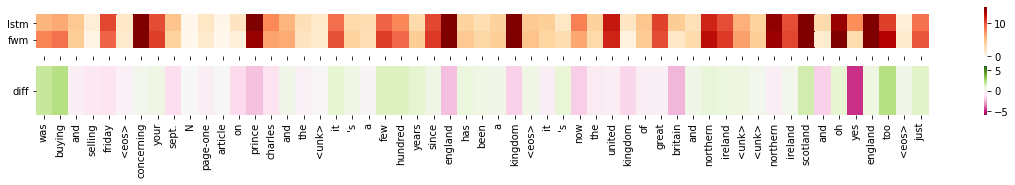

position:  1900
word:  from
fwm bits: 1.2016
lstm bits: 5.2726



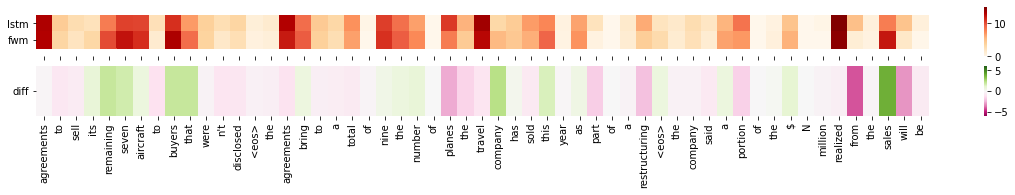

position:  2106
word:  l.j.
fwm bits: 6.3793
lstm bits: 12.0446



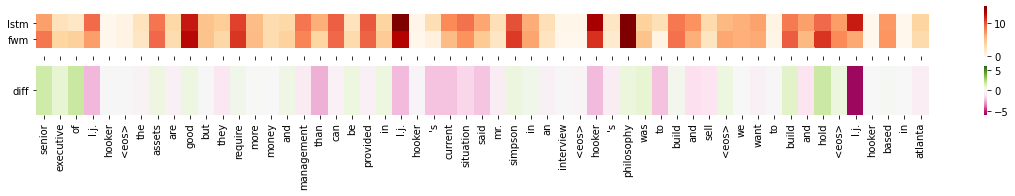

position:  2130
word:  hooker
fwm bits: 2.7430
lstm bits: 7.7096



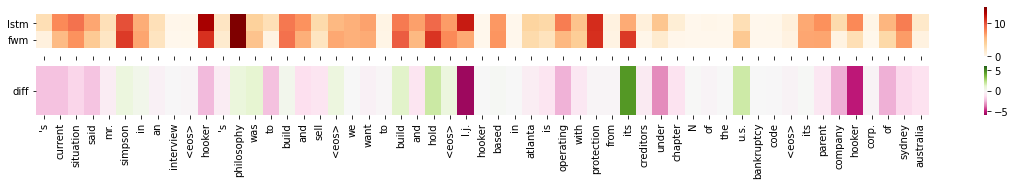

position:  2180
word:  committee
fwm bits: 7.0185
lstm bits: 11.1202



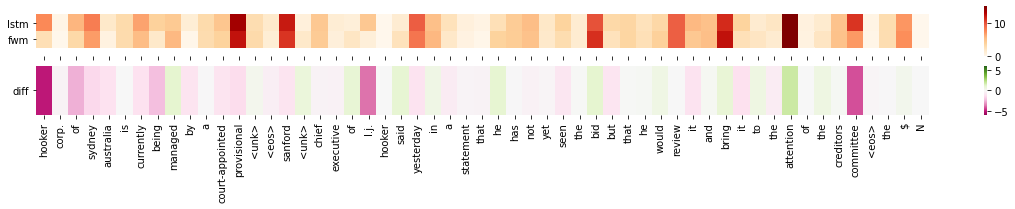

position:  2221
word:  l.j.
fwm bits: 2.9939
lstm bits: 10.7553



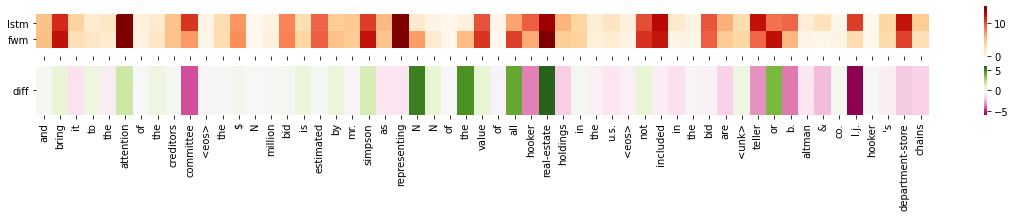

position:  2254
word:  center
fwm bits: 7.2654
lstm bits: 11.3127



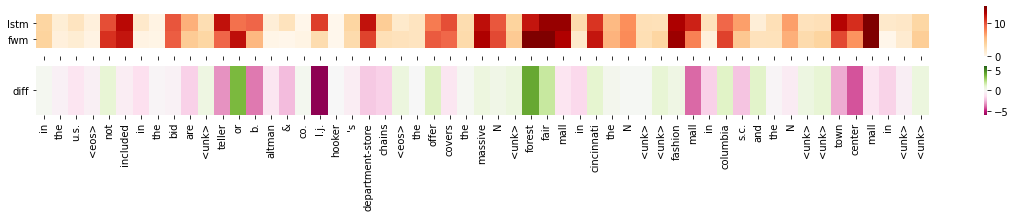

position:  2471
word:  hooker
fwm bits: 6.9845
lstm bits: 12.4267



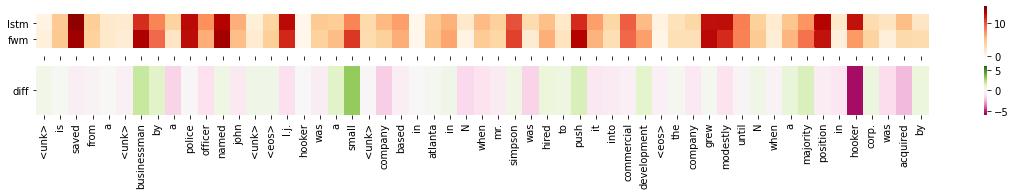

position:  2497
word:  acquisition
fwm bits: 2.1497
lstm bits: 6.5310



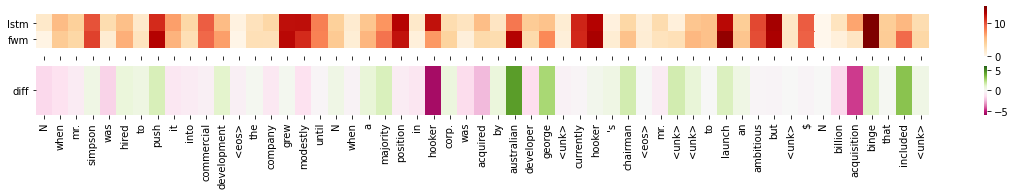

position:  2504
word:  b.
fwm bits: 5.3683
lstm bits: 9.5443



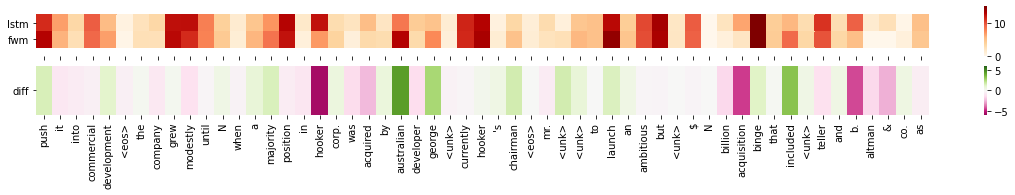

position:  2514
word:  merksamer
fwm bits: 2.8945
lstm bits: 9.5772



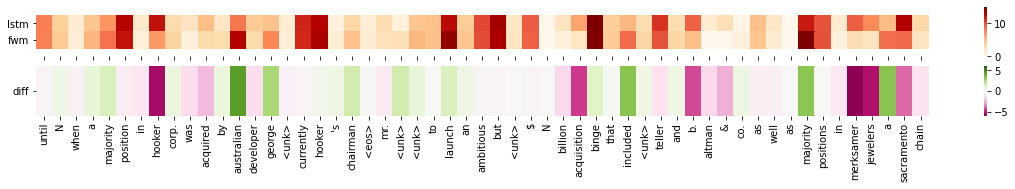

position:  2515
word:  jewelers
fwm bits: 2.3394
lstm bits: 7.5869



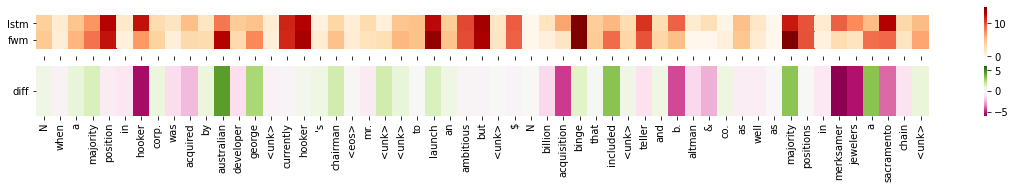

position:  2559
word:  hooker
fwm bits: 6.2882
lstm bits: 11.6794



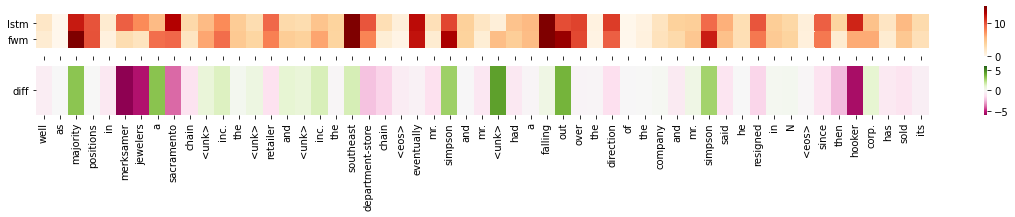

position:  2648
word:  assets
fwm bits: 9.6865
lstm bits: 13.9242



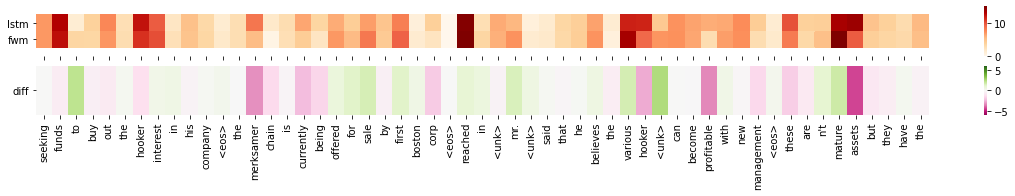

position:  2673
word:  properties
fwm bits: 9.9889
lstm bits: 14.3326



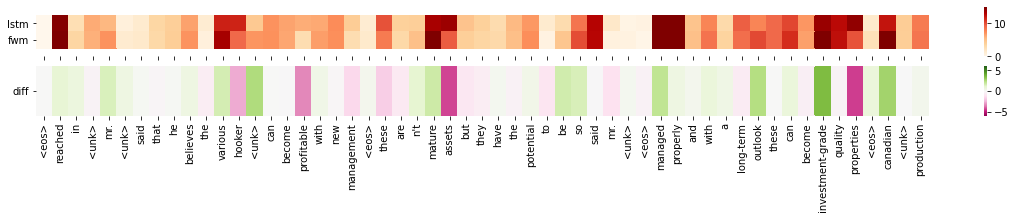

position:  2700
word:  statistics
fwm bits: 7.0142
lstm bits: 12.5294



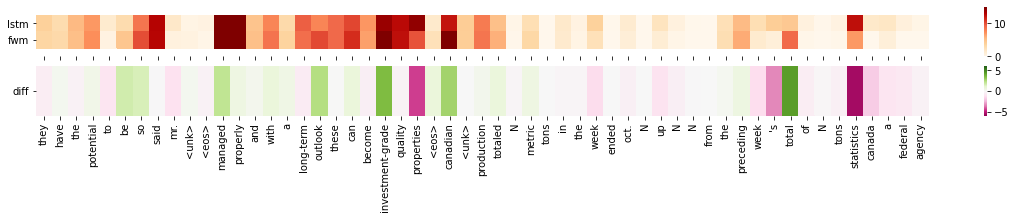

position:  2794
word:  must
fwm bits: 4.1928
lstm bits: 8.5748



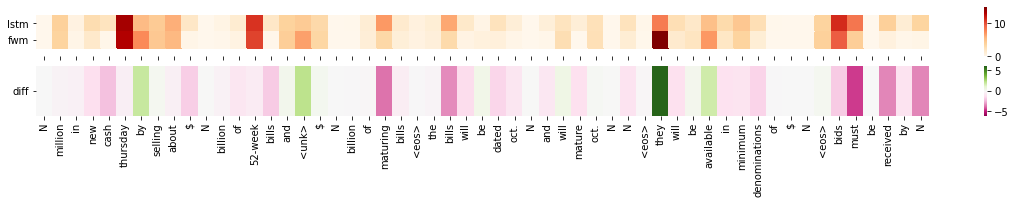

position:  2839
word:  withdrawals
fwm bits: 7.6265
lstm bits: 11.7079



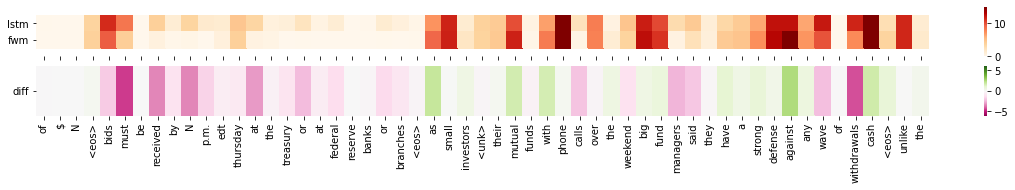

position:  2860
word:  fund
fwm bits: 6.0399
lstm bits: 10.3190



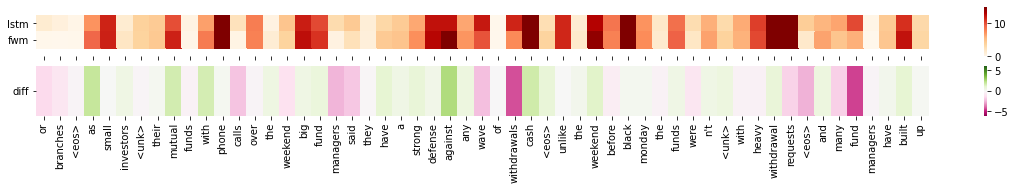

position:  2879
word:  investments
fwm bits: 2.4656
lstm bits: 6.9755



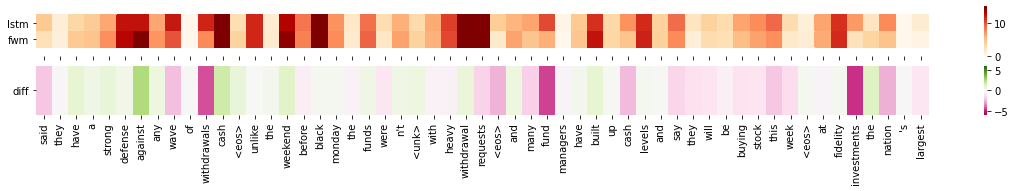

position:  2884
word:  fund
fwm bits: 1.9533
lstm bits: 5.9769



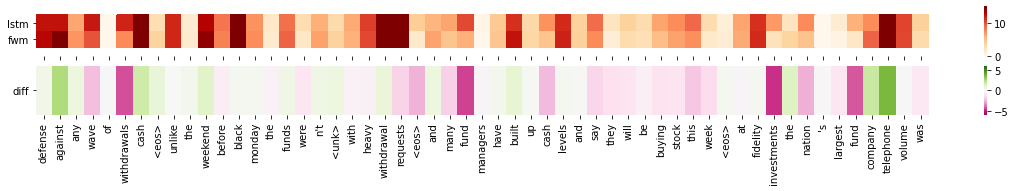

position:  2977
word:  fidelity
fwm bits: 5.4763
lstm bits: 11.7091



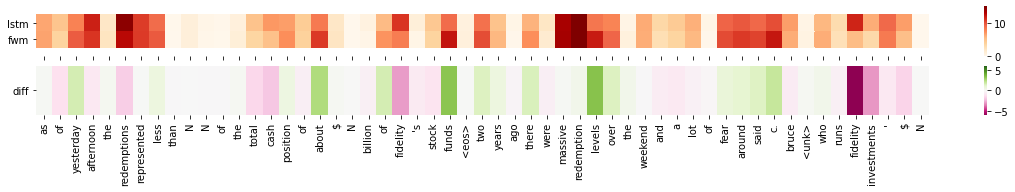

position:  3103
word:  funds
fwm bits: 3.2746
lstm bits: 7.3456



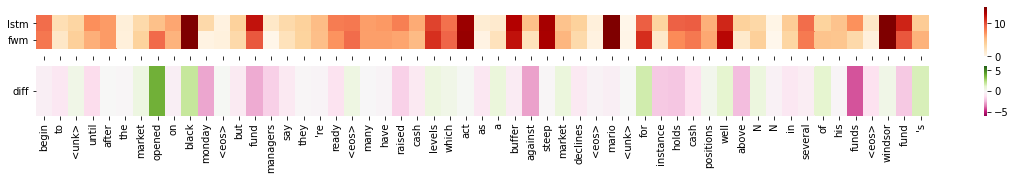

position:  3176
word:  fund
fwm bits: 0.8472
lstm bits: 5.3355



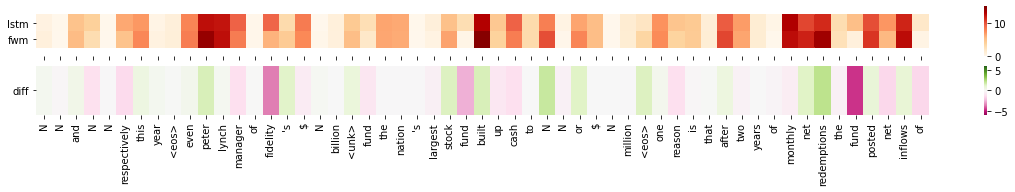

position:  3271
word:  fund
fwm bits: 1.8376
lstm bits: 6.3551



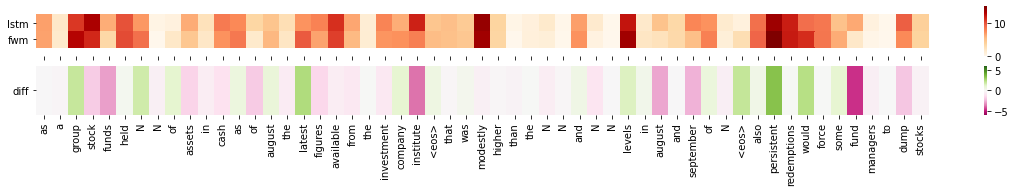

position:  3308
word:  back
fwm bits: 0.7024
lstm bits: 4.8395



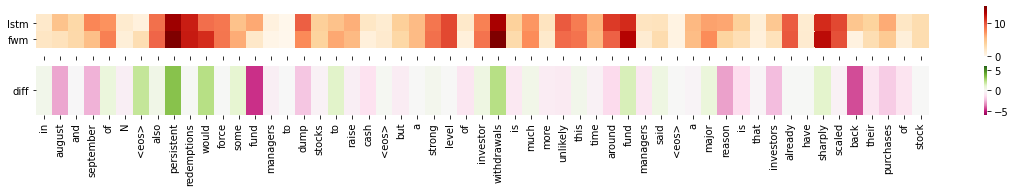

position:  3351
word:  vanguard
fwm bits: 5.1441
lstm bits: 9.3438



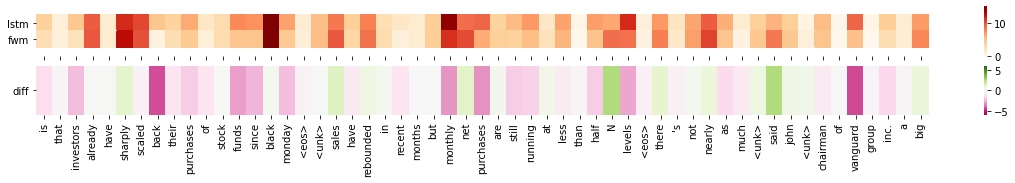

position:  3359
word:  fund
fwm bits: 2.5459
lstm bits: 8.7549



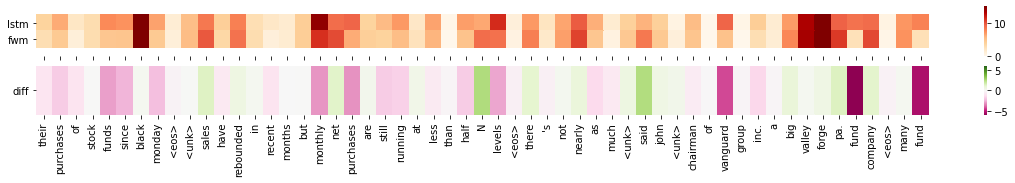

position:  3363
word:  fund
fwm bits: 2.6802
lstm bits: 8.0169



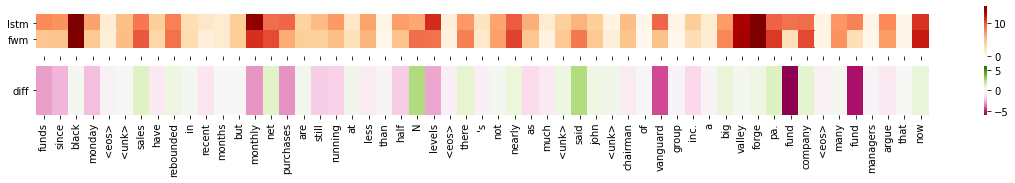

position:  3390
word:  squibb
fwm bits: 0.4445
lstm bits: 5.2409



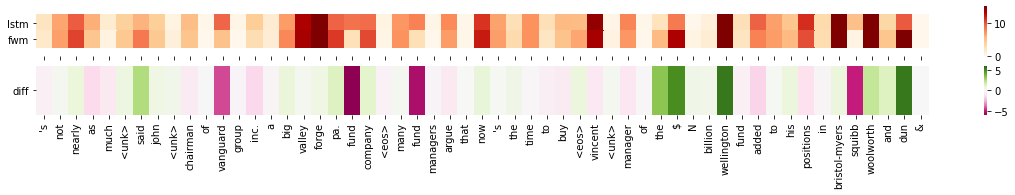

position:  3461
word:  bristol-myers
fwm bits: 7.1202
lstm bits: 11.7225



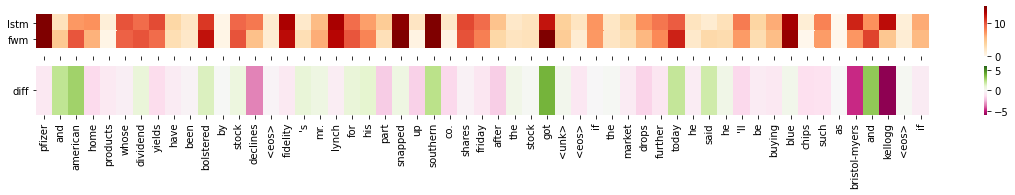

position:  3463
word:  kellogg
fwm bits: 4.7066
lstm bits: 12.6431



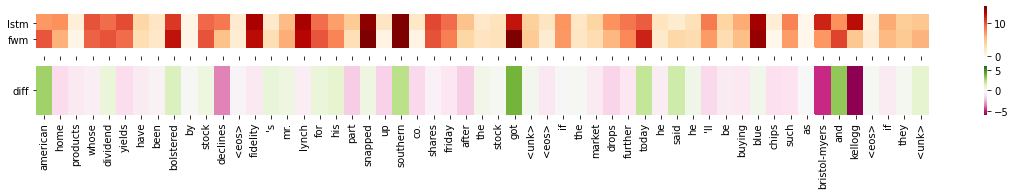

position:  3500
word:  pace
fwm bits: 5.8294
lstm bits: 11.8725



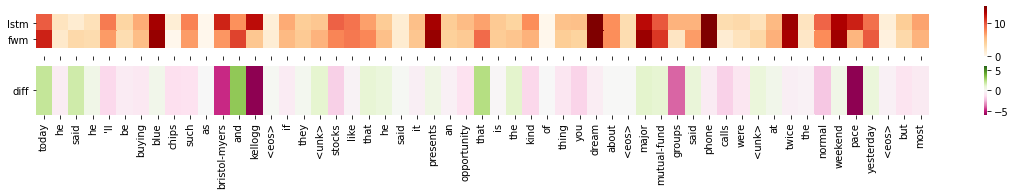

position:  3641
word:  steven
fwm bits: 9.3215
lstm bits: 14.8313



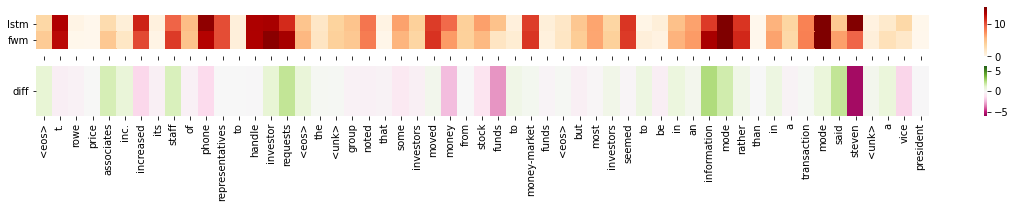

position:  3695
word:  opportunity
fwm bits: 0.9436
lstm bits: 5.4717



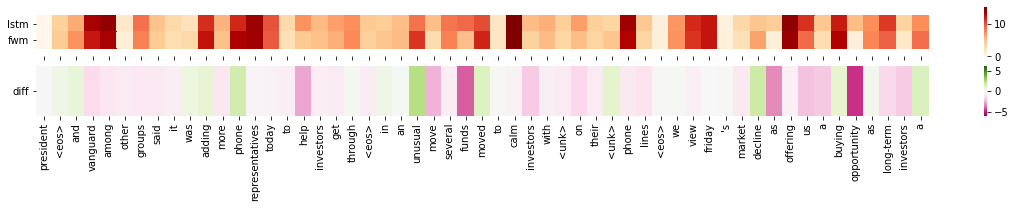

position:  3722
word:  fund
fwm bits: 8.4795
lstm bits: 12.8901



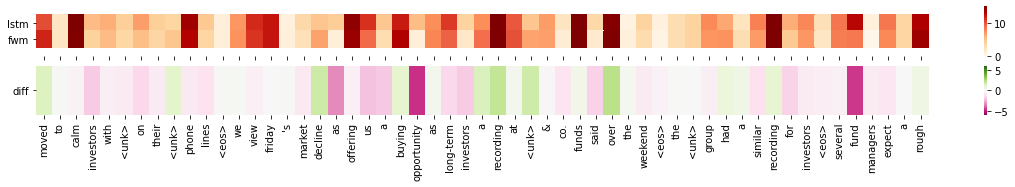

position:  3771
word:  lipper
fwm bits: 1.6173
lstm bits: 5.9525



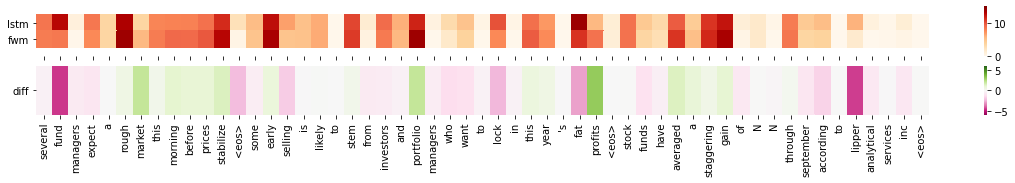

position:  3790
word:  portfolio
fwm bits: 4.0403
lstm bits: 8.1660



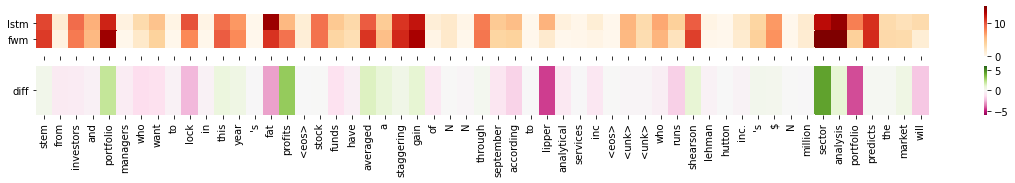

position:  3875
word:  she
fwm bits: 6.0780
lstm bits: 10.2322



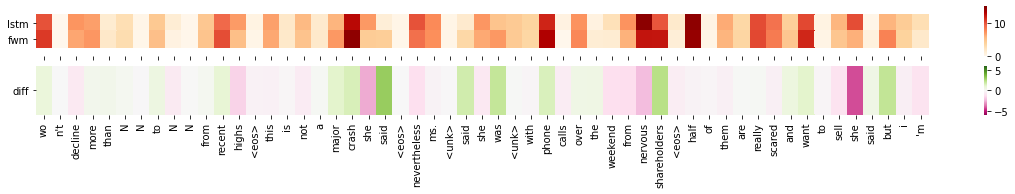

position:  4517
word:  amr
fwm bits: 3.4230
lstm bits: 7.6468



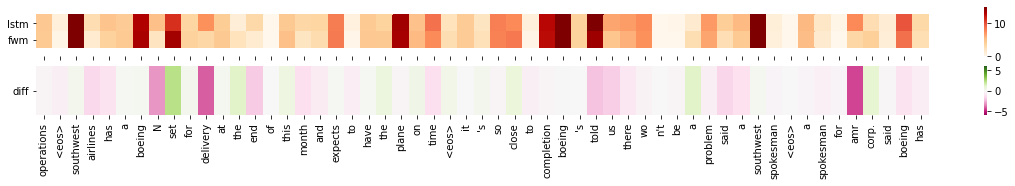

position:  4966
word:  machinists
fwm bits: 5.0179
lstm bits: 9.0191



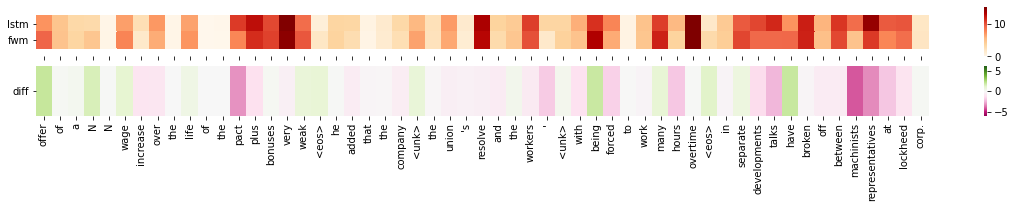

position:  5053
word:  boeing
fwm bits: 1.7876
lstm bits: 7.1477



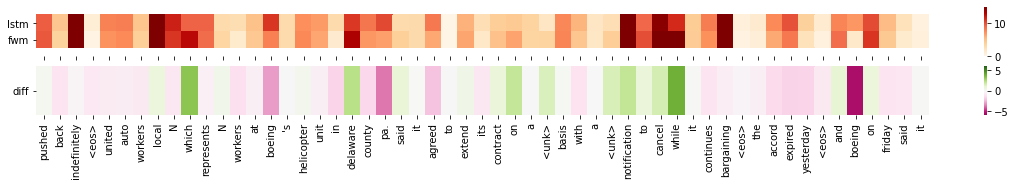

position:  5206
word:  electric
fwm bits: 8.1768
lstm bits: 13.0030



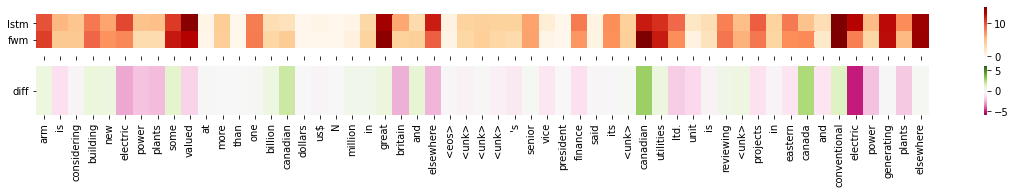

position:  5298
word:  plants
fwm bits: 6.1163
lstm bits: 11.7316



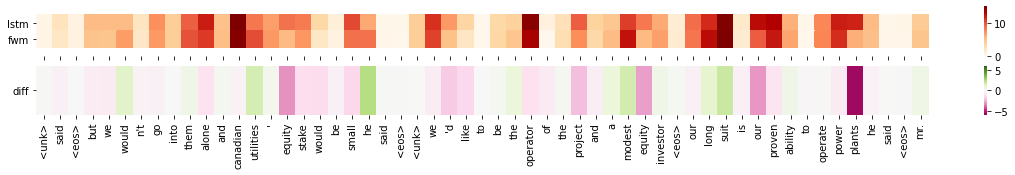

position:  5354
word:  #
fwm bits: 1.2691
lstm bits: 5.2896



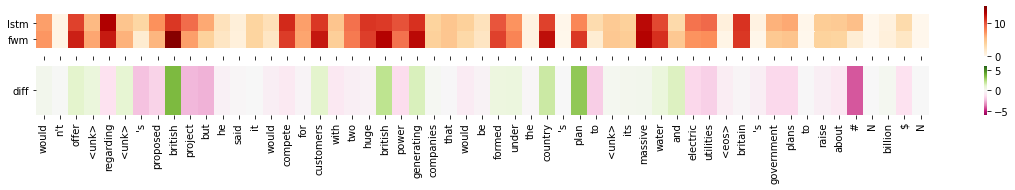

position:  5390
word:  #
fwm bits: 3.1791
lstm bits: 8.0863



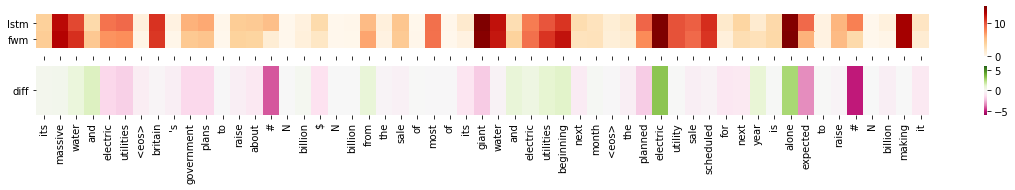

In [16]:
mask = diff < -4.0  # cases where the FWM is better than the LSTM
indices = mask.nonzero()[:,0]
print("cases: ", len(indices))
for idx in indices[:50]:
    if idx > 50:
        text_segment(idx)

cases:  349
position:  153
word:  walt
fwm bits: 18.5002
lstm bits: 14.4749



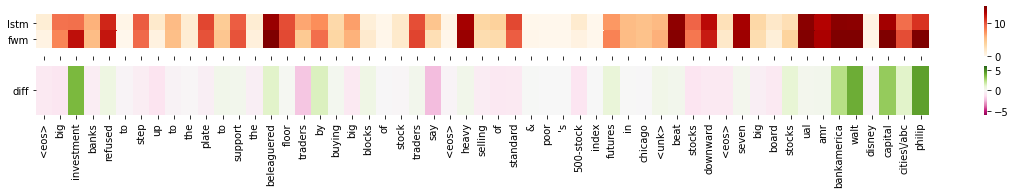

position:  157
word:  philip
fwm bits: 15.5644
lstm bits: 11.1895



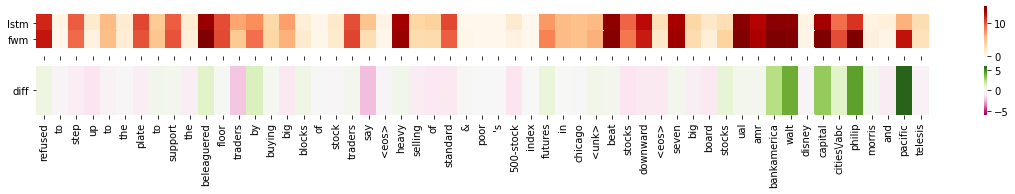

position:  160
word:  pacific
fwm bits: 12.4441
lstm bits: 5.9893



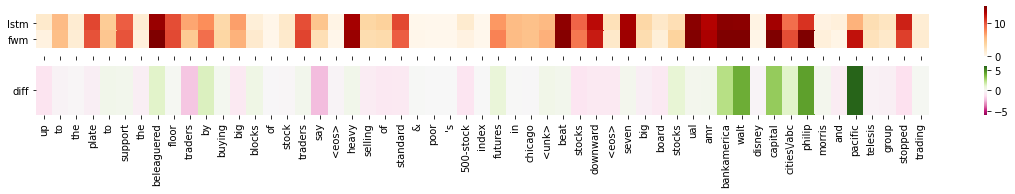

position:  363
word:  <eos>
fwm bits: 7.6381
lstm bits: 3.2131



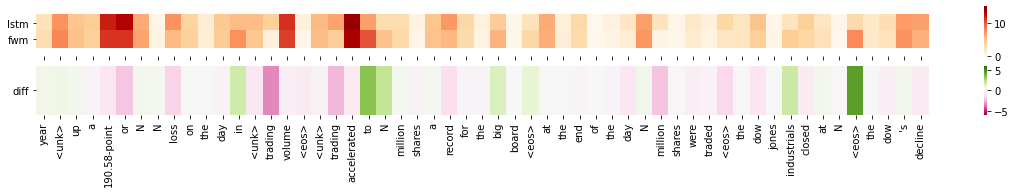

position:  1125
word:  <unk>
fwm bits: 11.9172
lstm bits: 3.2129



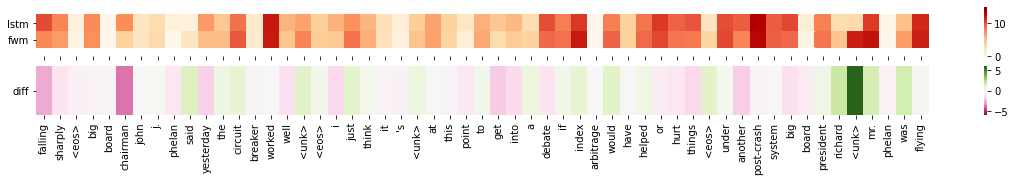

position:  1268
word:  was
fwm bits: 11.1001
lstm bits: 6.4614



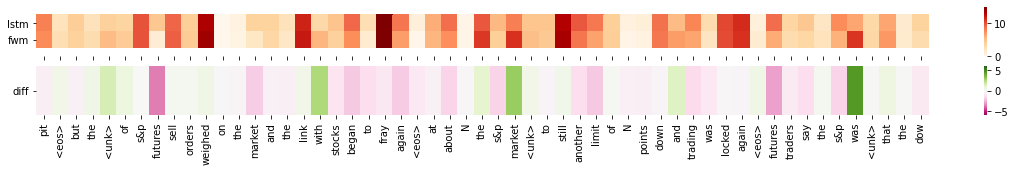

position:  1339
word:  <unk>
fwm bits: 7.7750
lstm bits: 3.2618



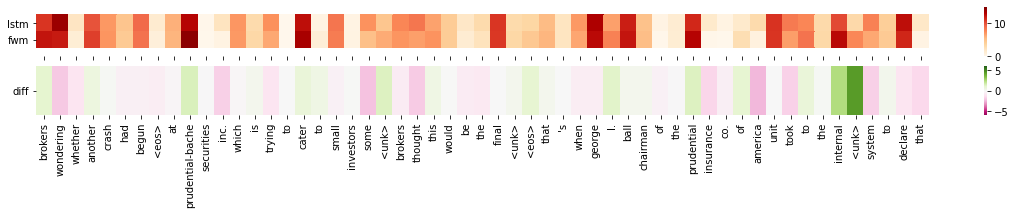

position:  1847
word:  call
fwm bits: 20.4080
lstm bits: 15.4522



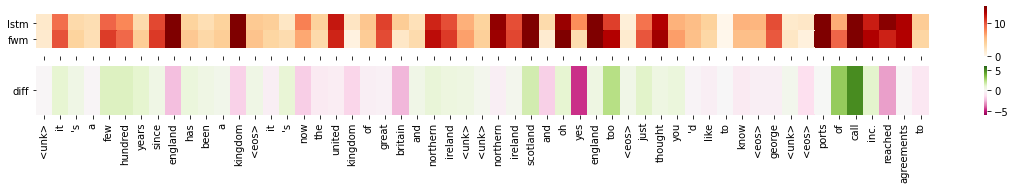

position:  1946
word:  investors
fwm bits: 7.5342
lstm bits: 3.5231



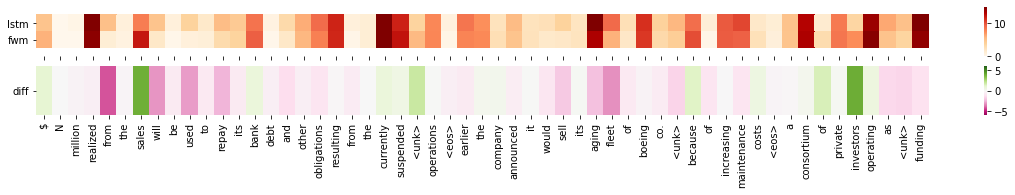

position:  1969
word:  real-estate
fwm bits: 16.9688
lstm bits: 11.3840



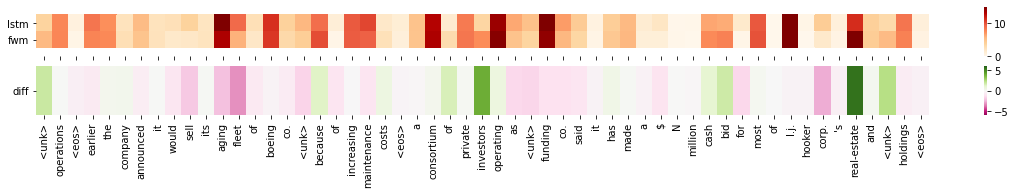

position:  2116
word:  its
fwm bits: 10.9153
lstm bits: 6.3071



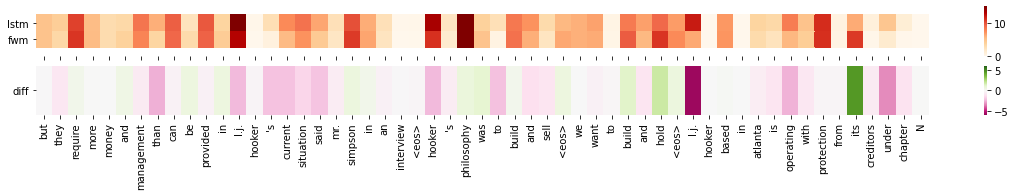

position:  2194
word:  N
fwm bits: 6.8954
lstm bits: 1.6220



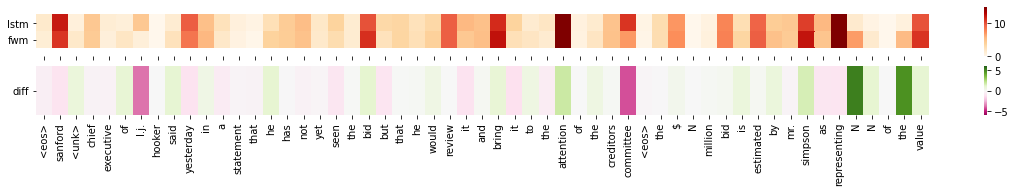

position:  2197
word:  the
fwm bits: 5.5937
lstm bits: 0.7661



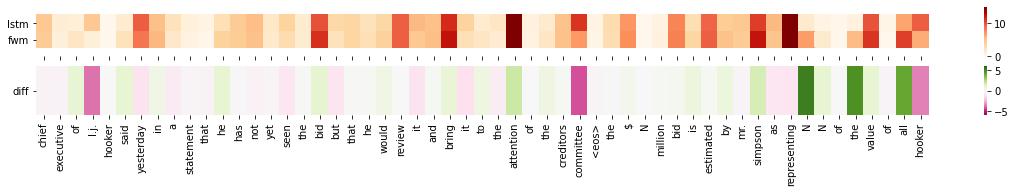

position:  2200
word:  all
fwm bits: 10.7185
lstm bits: 6.5257



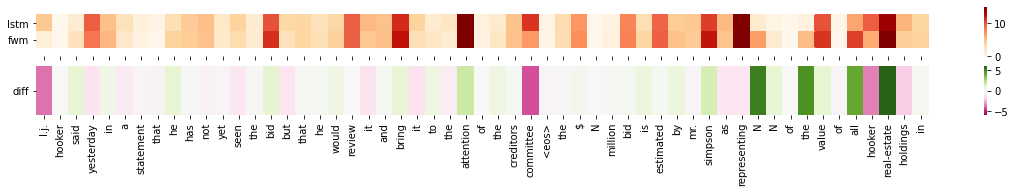

position:  2202
word:  real-estate
fwm bits: 22.4215
lstm bits: 13.8844



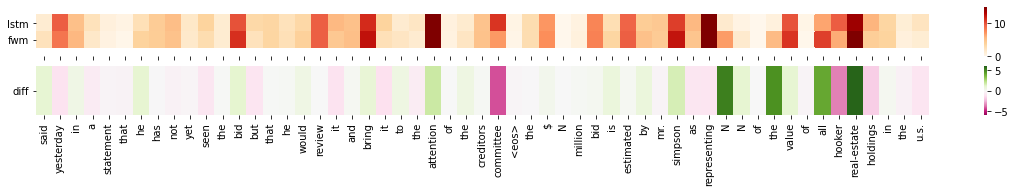

position:  2234
word:  forest
fwm bits: 16.4562
lstm bits: 12.3000



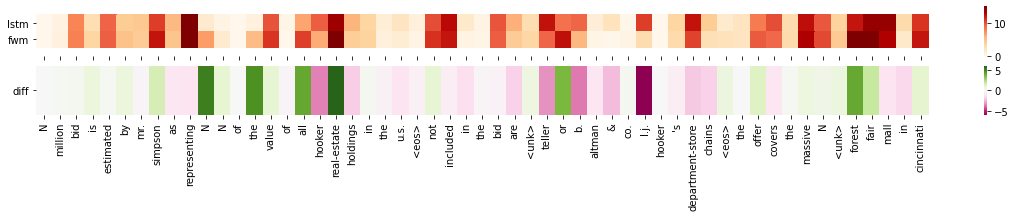

position:  2322
word:  merrill
fwm bits: 18.4167
lstm bits: 14.2728



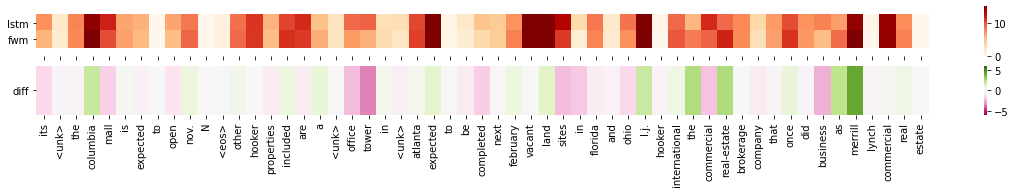

position:  2476
word:  australian
fwm bits: 13.0133
lstm bits: 8.5432



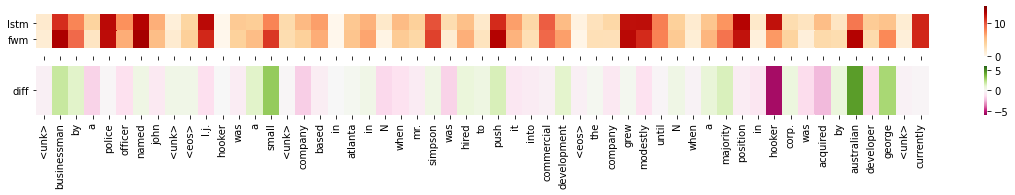

position:  2537
word:  <unk>
fwm bits: 5.4230
lstm bits: 1.0268



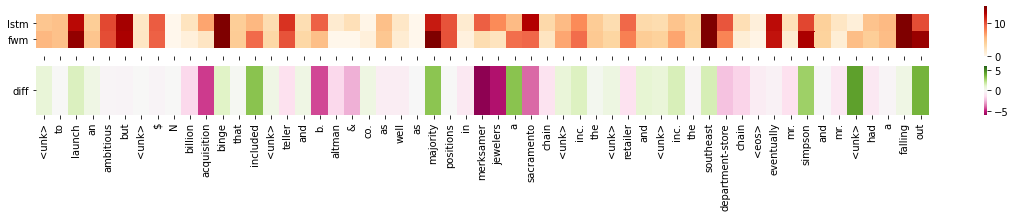

position:  2696
word:  total
fwm bits: 9.1354
lstm bits: 4.6578



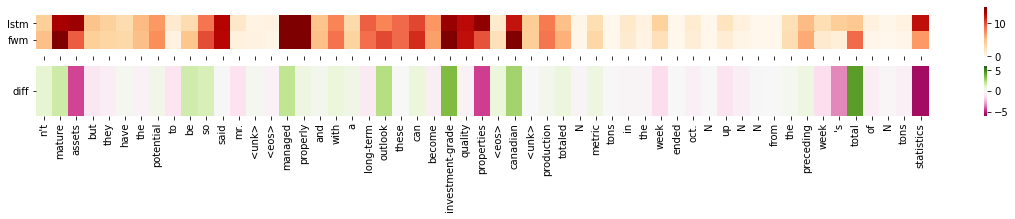

position:  2782
word:  they
fwm bits: 17.1184
lstm bits: 8.3067



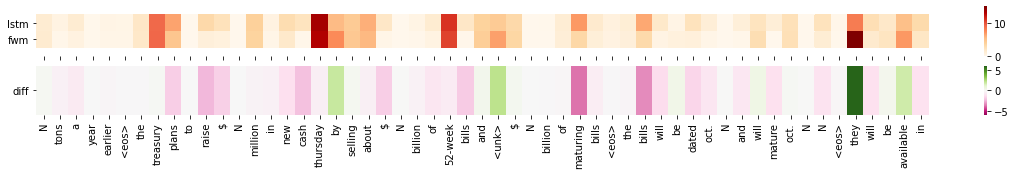

position:  3113
word:  '
fwm bits: 17.3233
lstm bits: 13.2125



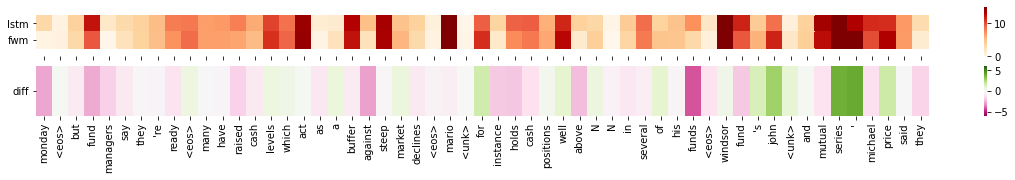

position:  3379
word:  $
fwm bits: 13.3037
lstm bits: 8.3941



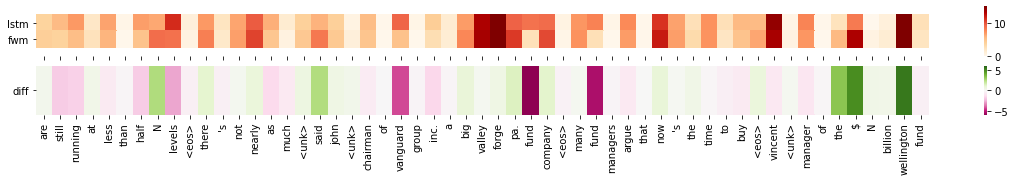

position:  3382
word:  wellington
fwm bits: 21.4700
lstm bits: 15.9904



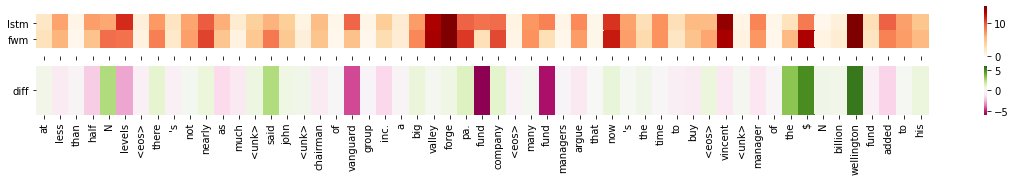

position:  3393
word:  dun
fwm bits: 15.2313
lstm bits: 9.7800



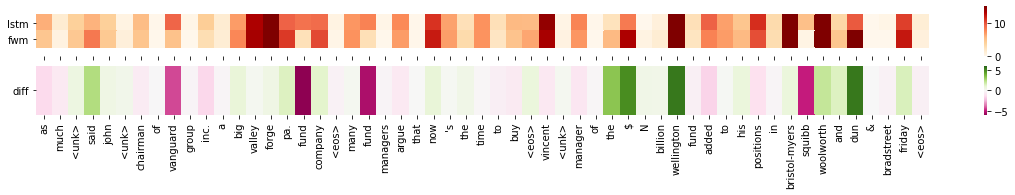

position:  3788
word:  sector
fwm bits: 17.0719
lstm bits: 12.7148



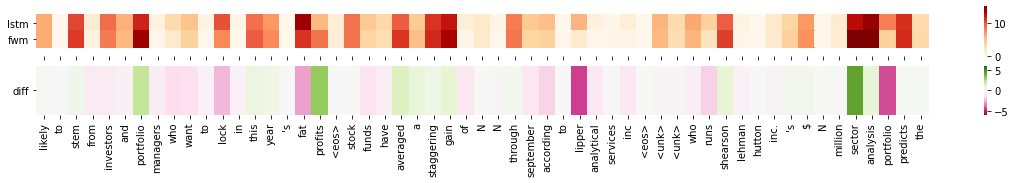

position:  3969
word:  $
fwm bits: 13.8433
lstm bits: 8.9457



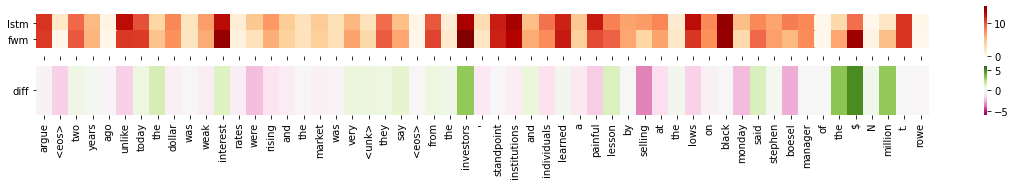

position:  4154
word:  that
fwm bits: 12.0851
lstm bits: 6.3819



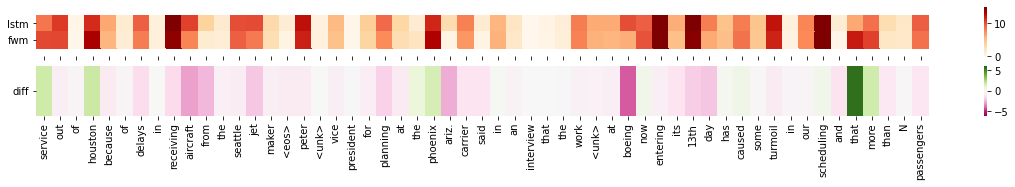

position:  4448
word:  check
fwm bits: 25.3185
lstm bits: 17.8604



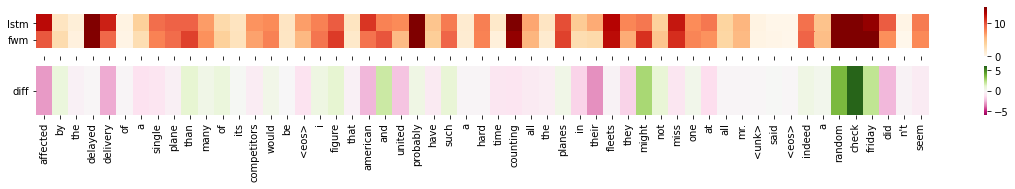

position:  4644
word:  plane
fwm bits: 16.0389
lstm bits: 11.2959



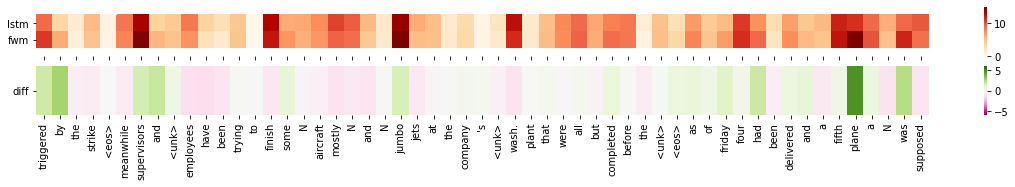

In [17]:
mask = diff > 4.0  # cases where the LSTM is better than the FWM
indices = mask.nonzero()[:,0]
print("cases: ", len(indices))
for idx in indices[:30]:
    if idx > 50:
        text_segment(idx)